<a href="https://colab.research.google.com/github/Kushal997-das/30-days-code/blob/master/Decision_Tree_for_Playing_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

A decision tree is a flowchart-like structure where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The tree can be used for classification, regression, and even multi-output tasks. The goal is to create a model that predicts the value of a target variable based on several input variables. Decision trees can be constructed by an algorithmic approach that recursively splits the dataset into smaller subsets based on the most significant attribute, resulting in a tree with decision nodes and leaf nodes. They are easy to interpret and visualize, and can handle both categorical and numerical data.

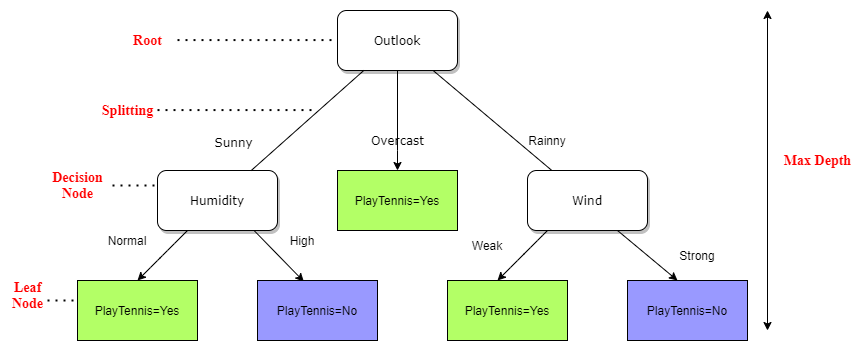

Interpreting a Decision Tree
IF Outlook = Sunny AND Humidity = Normal THEN Playtennis = Yes
IF Outlook = Overcast THEN Playtennis =Yes
IF Outlook = Rain AND Wind = Strong THEN Playtennis = No
Where should you use decision tree?
The learning data has attribute value pair like in the example given :
*Wind as an attribute has two possible values – strong or weak
*Target function has discrete output. Here, the target function is – should you play tennis? And the output to this is a discrete– Yes and No

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tennis = pd.read_csv('/content/PlayTennis (2).csv')

In [ ]:
tennis.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
tennis.tail()

,outlook,temp,humidity,windy,play
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


In [ ]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
#find the null values in Dataset
tennis.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

<Axes: >

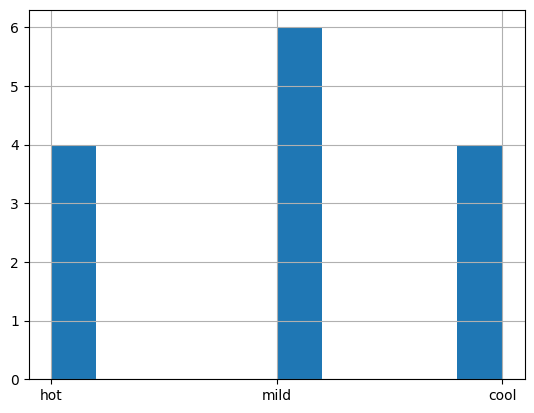

In [ ]:
tennis['temp'].hist()

<Axes: >

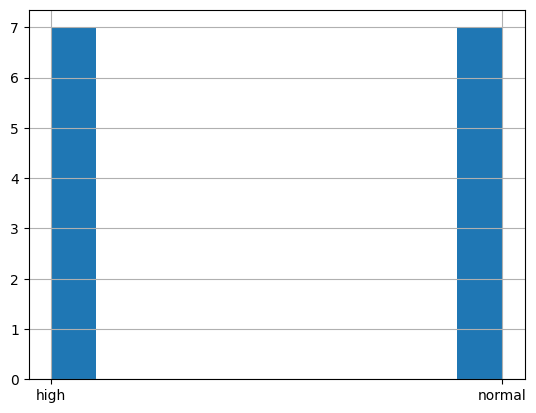

In [ ]:
tennis['humidity'].hist()

In [ ]:
print(tennis['outlook'].unique())
print(tennis['temp'].unique())
print(tennis['humidity'].unique())
print(tennis['windy'].unique())
print(tennis['play'].unique())

['sunny' 'overcast' 'rainy']
['hot' 'mild' 'cool']
['high' 'normal']
[False  True]
['no' 'yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
tennis['outlook']=Le.fit_transform(tennis['outlook'])
tennis['temp']=Le.fit_transform(tennis['temp'])
tennis['humidity']=Le.fit_transform(tennis['humidity'])
tennis['windy']=Le.fit_transform(tennis['windy'])
tennis['play']=Le.fit_transform(tennis['play'])

In [ ]:
print(tennis['outlook'].unique())
print(tennis['temp'].unique())
print(tennis['humidity'].unique())
print(tennis['windy'].unique())
print(tennis['play'].unique())

[2 0 1]
[1 2 0]
[0 1]
[0 1]
[0 1]


In [ ]:
tennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [ ]:
y = tennis['play'] #decision column
x=tennis.drop(['play'],axis=1) #dropping decision column

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Fitting the model
from sklearn import tree
y_train=tennis['play']
x_train=tennis.drop(['play'],axis=1)

In [ ]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

[Text(0.4, 0.9, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

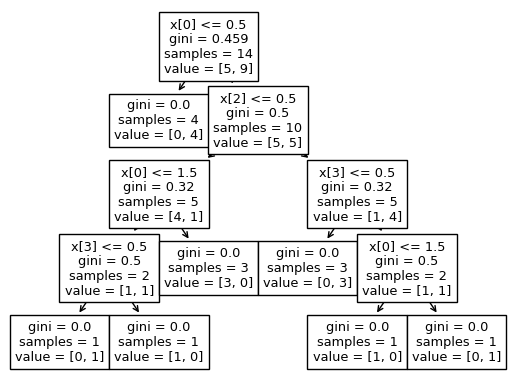

In [ ]:
#We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

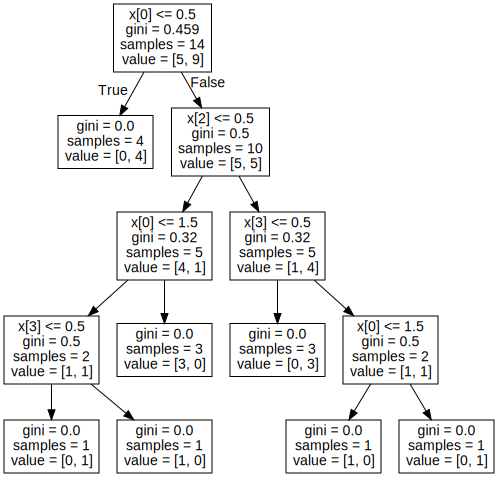

In [ ]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
x_pred=clf.predict(x_test)
x_test

,outlook,temp,humidity,windy
13,1,2,0,1
2,0,1,0,0
3,1,2,0,0


In [ ]:
x_pred==y_test

13    True
2     True
3     True
Name: play, dtype: bool

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confmat1=confusion_matrix(x_pred,y_test)
confmat1

array([[1, 0],
       [0, 2]])

In [ ]:
print(accuracy_score(x_pred,y_test))

1.0


In [ ]:
import joblib
joblib.dump(clf, "playTennis.pkl")
model = joblib.load("playTennis.pkl")

outlook = int(input("Enter outlook ?"))
wind = int(input("Enter wind ?"))
temp = int(input("Enter temp ?"))
humidity = int(input("Enter humidity ?"))

play=model.predict([[outlook,wind,temp,humidity]])[0]
if play==1:
  print("you can play ")
else:
    print("weather is not fit to play outside")

In [ ]:
#